### Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels import stats
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Importamos datos

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

### Exploración inicial

#### train

In [3]:
df_train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.0
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.0
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,854.0
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1483.0
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,1TB HDD,AMD Radeon R4,Windows 10,2.8kg,519.0


In [4]:
df_train.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
907,996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,549.00
908,731,Dell,Alienware 17,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,3659.40
909,276,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,16GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1549.00
910,585,MSI,GT73VR Titan,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14kg,2729.00
911,1173,HP,15-bw002nv (A6-9220/4GB/256GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD A6-Series A6-9220 2.5GHz,4GB,256GB SSD,AMD Radeon 520,Windows 10,1.91kg,478.89


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [6]:
df_train.shape

(912, 13)

In [7]:
df_train.duplicated().sum()

0

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,912.0,669.402412,379.372130,1.0,345.75,676.5,993.0000,1318.0
Inches,912.0,14.982785,1.417299,10.1,14.00,15.6,15.6000,18.4
Price_euros,912.0,1116.964013,681.619330,191.9,598.00,979.0,1476.3325,5499.0


In [9]:
df_train.describe(include='object')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,912,912,912,912,912,912,912,912,912,912
unique,19,467,6,34,96,8,32,94,9,166
top,Lenovo,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,215,21,515,345,133,430,293,197,751,88


In [10]:
df_train['Memory'].unique()

array(['500GB HDD', '256GB SSD', '512GB SSD', '1TB HDD', '1.0TB Hybrid',
       '128GB SSD +  1TB HDD', '256GB SSD +  1TB HDD', '128GB SSD',
       '256GB SSD +  500GB HDD', '256GB Flash Storage',
       '512GB SSD +  1TB HDD', '32GB Flash Storage', '64GB Flash Storage',
       '64GB SSD', '512GB SSD +  256GB SSD', '1TB SSD', '180GB SSD',
       '128GB SSD +  2TB HDD', '128GB Flash Storage', '2TB HDD',
       '1TB HDD +  1TB HDD', '32GB SSD', '16GB Flash Storage',
       '256GB SSD +  256GB SSD', '512GB SSD +  2TB HDD', '16GB SSD',
       '256GB SSD +  2TB HDD', '512GB Flash Storage', '508GB Hybrid',
       '64GB Flash Storage +  1TB HDD', '512GB SSD +  512GB SSD',
       '1TB SSD +  1TB HDD'], dtype=object)

### Limpieza

In [11]:
df_train = pd.read_csv('./data/train.csv')

In [12]:
df_train['Ram'] =  df_train['Ram'].map( lambda x : x.rstrip('GB')).astype(int)
df_train['Weight'] =  df_train['Weight'].map( lambda x : x.rstrip('kg')).astype(float)

df_train['Speed'] = df_train['Cpu'].str.extract('(\d+(?:\.\d+)?)GHz').astype(float)
df_train['Cpu'] = df_train['Cpu'].str.replace(r'(\d+(?:\.\d+)?)GHz', '', regex=True)
def procesar_columna(columna):
    # Verificar si la columna tiene algún valor
    if pd.notna(columna):
        # Utilizar el método split para obtener una lista
        lista_resultante = str(columna).split()

        # Verificar la longitud de la lista y realizar el reemplazo adecuado
        if len(lista_resultante) >= 2:
            return f"{lista_resultante[0]} {lista_resultante[1]}"
        elif len(lista_resultante) == 1:
            return lista_resultante[0]
    
    # Valor predeterminado si no se puede procesar la columna
    return 'Unk'

df_train['Product'] = df_train['Product'].apply(procesar_columna)
pattern = re.compile(r'\([^)]*\)?')
df_train['Product'] = [re.sub(pattern, '', laptop).strip() if '(' in laptop else laptop for laptop in df_train['Product']]

def categorizar_por_marca(producto):
    if 'Aspire' in producto:
        return 'Acer Aspire'
    elif 'XPS' in producto or 'Inspiron' in producto:
        return 'Dell XPS/Inspiron'
    elif 'Elitebook' in producto or 'ProBook' in producto:
        return 'HP Elitebook/ProBook'
    elif 'IdeaPad' in producto or 'Legion' in producto:
        return 'Lenovo IdeaPad/Legion'
    # Agregar más marcas según sea necesario
    else:
        return 'Otras Marcas'

# Crear una nueva columna 'Categoria' en el DataFrame
df_train['Categoria'] = df_train['Product'].apply(categorizar_por_marca)

def asignar_grupo(gpu_nombre):
    if re.search(r'Intel', gpu_nombre):
        return 'Intel'
    elif re.search(r'Nvidia', gpu_nombre):
        return 'Nvidia'
    elif re.search(r'AMD', gpu_nombre):
        return 'AMD'
    else:
        return 'Otro'

# Aplicar la función para crear una nueva columna 'Gpu_group'
df_train['Gpu_group'] = df_train['Gpu'].apply(asignar_grupo)

df_train['Disco'] = df_train['Memory'].str.extract('(HDD|SSD)', expand=False).fillna('Any')
df_train['Capacidad'] = df_train['Memory'].str.replace(r'(HDD|SSD)', '', regex=True)

In [14]:
df_train['Capacidad'].unique()

array(['500GB ', '256GB ', '512GB ', '1TB ', '1.0TB Hybrid',
       '128GB  +  1TB ', '256GB  +  1TB ', '128GB ', '256GB  +  500GB ',
       '256GB Flash Storage', '512GB  +  1TB ', '32GB Flash Storage',
       '64GB Flash Storage', '64GB ', '512GB  +  256GB ', '180GB ',
       '128GB  +  2TB ', '128GB Flash Storage', '2TB ', '1TB  +  1TB ',
       '32GB ', '16GB Flash Storage', '256GB  +  256GB ',
       '512GB  +  2TB ', '16GB ', '256GB  +  2TB ', '512GB Flash Storage',
       '508GB Hybrid', '64GB Flash Storage +  1TB ', '512GB  +  512GB '],
      dtype=object)

In [61]:
import pandas as pd

# Crear DataFrame de ejemplo
data = {'Capacidad' : ['500GB', '256GB', '512GB', '1TB', '1.0TB Hybrid', '1.0TBHybrid',
       '128GB  +  1TB', '256GB  +  1TB', '128GB ', '256GB  +  500GB',
       '256GB Flash Storage', '512GB  +  1TB', '32GB Flash Storage',
       '64GB Flash Storage', '64GB', '512GB  +  256GB', '180GB',
       '128GB  +  2TB', '128GB Flash Storage', '2TB', '1TB  +  1TB',
       '32GB', '16GB Flash Storage', '256GB  +  256GB',
       '512GB  +  2TB', '16GB ', '256GB  +  2TB', '512GB Flash Storage',
       '508GB Hybrid', '64GB Flash Storage +  1TB', '512GB  +  512GB', '256TB']}

DF = pd.DataFrame(data)

# Transformar '1.0TB Hybrid' o '1.0TBHybrid' a '1TB'
DF['Capacidad'] = DF['Capacidad'].str.replace(r'(\d+)\.\d+?TB\s*(Hybrid)?', r'\1TB', regex=True)

# Eliminar espacios de la columna_capacidad
DF['Capacidad'] = DF['Capacidad'].str.replace(' ', '')

# # Dividir la columna_capacidad en partes para manejar casos como '128GB+1TB' o '256GB+500GB'
# split_values = DF['Capacidad'].str.split('+')

# # Inicializar la nueva columna 'Capacidad_GB'
# DF['Capacidad_GB'] = 0

# for values in split_values:
#     gb_values = [int(val.replace('GB', '')) if 'GB' in val else 0 for val in values]
#     tb_values = [int(val.replace('TB', '')) * 1000 if 'TB' in val else 0 for val in values]

#     # Sumar los valores en GB y TB
#     DF['Capacidad_GB'] += sum(gb_values) + sum(tb_values)

# # Considerar valores que solo son dígitos seguidos por 'TB' como GB
# DF['Capacidad_GB'] += DF['Capacidad'].str.extract(r'(\d+)TB', expand=False).astype(float).fillna(0) * 1000

# # Mostrar el resultado
# print(DF.head(11))
DF.Capacidad

0                    500GB
1                    256GB
2                    512GB
3                      1TB
4                      1TB
5                      1TB
6                128GB+1TB
7                256GB+1TB
8                    128GB
9              256GB+500GB
10       256GBFlashStorage
11               512GB+1TB
12        32GBFlashStorage
13        64GBFlashStorage
14                    64GB
15             512GB+256GB
16                   180GB
17               128GB+2TB
18       128GBFlashStorage
19                     2TB
20                 1TB+1TB
21                    32GB
22        16GBFlashStorage
23             256GB+256GB
24               512GB+2TB
25                    16GB
26               256GB+2TB
27       512GBFlashStorage
28             508GBHybrid
29    64GBFlashStorage+1TB
30             512GB+512GB
31                   256TB
Name: Capacidad, dtype: object

In [62]:
import pandas as pd

def procesar_capacidad(df, columna_capacidad):
    df['Capacidad_GB'] = 0

    # Antes de aplicar la función, transformar '1.0TB Hybrid' o '1.0TBHybrid' a '1TB'
    df[columna_capacidad] = df[columna_capacidad].str.replace(r'(\d+)\.\d+?TB\s*(Hybrid)?', r'\1TB', regex=True)

    # Eliminar espacios de la columna_capacidad
    df[columna_capacidad] = df[columna_capacidad].str.strip()
 
    df['Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    add_gb = df[columna_capacidad].str.extract('(\d+)GB \+ (\d+)GB', expand=False)
    add_tb = df[columna_capacidad].str.extract('(\d+)TB \+ (\d+)TB', expand=False)

    mask_plus = df[columna_capacidad].str.contains('\+')
    
    df.loc[~mask_plus, 'Capacidad_GB'] = df[columna_capacidad].str.extract('(\d+)GB', expand=False).astype(float).fillna(0)
    df.loc[~mask_plus, 'Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    df['Capacidad_GB'] += add_gb[0].astype(float).fillna(0) + add_gb[1].astype(float).fillna(0)
    df['Capacidad_TB'] += add_tb[0].astype(float).fillna(0)

    df['Capacidad_TB'] += df['Capacidad_GB'] // 1000
    df['Capacidad_GB'] %= 1000

    return df

# Crear DataFrame de ejemplo
data = {'Capacidad' : ['500GB', '256GB', '512GB', '1TB', '1.0TB Hybrid', '1.0TBHybrid',
       '128GB  +  1TB', '256GB  +  1TB', '128GB ', '256GB  +  500GB',
       '256GB Flash Storage', '512GB  +  1TB', '32GB Flash Storage',
       '64GB Flash Storage', '64GB', '512GB  +  256GB', '180GB',
       '128GB  +  2TB', '128GB Flash Storage', '2TB', '1TB  +  1TB',
       '32GB', '16GB Flash Storage', '256GB  +  256GB',
       '512GB  +  2TB', '16GB ', '256GB  +  2TB', '512GB Flash Storage',
       '508GB Hybrid', '64GB Flash Storage +  1TB', '512GB  +  512GB', '256TB']}

DF = pd.DataFrame(data)

# Aplicar la función a tu DataFrame
procesar_capacidad(DF, 'Capacidad')

# Mostrar el resultado
print(DF.head(11))


ValueError: invalid literal for int() with base 10: '256 Flash Storage'

In [13]:
def procesar_capacidad(df, columna_capacidad):
    df['Capacidad_GB'] = 0
    df['Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    add_gb = df[columna_capacidad].str.extract('(\d+)GB \+ (\d+)GB', expand=False)
    add_tb = df[columna_capacidad].str.extract('(\d+)TB \+ (\d+)TB', expand=False)

    mask_plus = df[columna_capacidad].str.contains('\+')
    
    df.loc[~mask_plus, 'Capacidad_GB'] = df[columna_capacidad].str.extract('(\d+)GB', expand=False).astype(float).fillna(0)
    df.loc[~mask_plus, 'Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    df['Capacidad_GB'] += add_gb[0].astype(float).fillna(0) + add_gb[1].astype(float).fillna(0)
    df['Capacidad_TB'] += add_tb[0].astype(float).fillna(0)

    df['Capacidad_TB'] += df['Capacidad_GB'] // 1000
    df['Capacidad_GB'] %= 1000

    return df

procesar_capacidad(df_train, 'Capacidad')
df_train.drop(columns=['Capacidad', 'Memory'], inplace=True)

In [14]:
# Función para extraer los números, determinar si es touchscreen, identificar la calidad de la pantalla y si contiene IPS Panel
def extraer_numeros_touch_calidad_ips(cadena):
    numeros = re.findall(r'\d+', cadena)
    touch = 'Touchscreen' in cadena
    calidad = re.search(r'(Full HD|Quad HD|4K Ultra HD|Retina Display)', cadena)
    calidad = calidad.group() if calidad else None
    ips_panel = 'IPS Panel' in cadena
    return {'Ancho': int(numeros[0]), 'Alto': int(numeros[1]), 'Touchscreen': touch, 'Calidad': calidad, 'IPS': ips_panel}

# Aplicar la función y expandir los resultados en nuevas columnas
df_train[['Ancho', 'Alto', 'Touchscreen', 'Calidad', 'IPS']] = df_train['ScreenResolution'].apply(extraer_numeros_touch_calidad_ips).apply(pd.Series)

df_train.fillna(0)
df_train.drop(columns = 'ScreenResolution')

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,...,Categoria,Gpu_group,Disco,Capacidad_GB,Capacidad_TB,Ancho,Alto,Touchscreen,Calidad,IPS
0,1104,Acer,Aspire ES1-523,Notebook,15.6,AMD A8-Series 7410,4,AMD Radeon R5,Windows 10,2.40,...,Acer Aspire,AMD,HDD,500.0,0.0,1366,768,False,None,False
1,114,Dell,XPS 13,Ultrabook,13.3,Intel Core i7 7560U,8,Intel Iris Plus Graphics 640,Windows 10,1.23,...,Dell XPS/Inspiron,Intel,SSD,256.0,0.0,3200,1800,True,Quad HD,False
2,172,Acer,Aspire A517-51G,Notebook,17.3,Intel Core i5 8250U,8,Nvidia GeForce MX150,Windows 10,3.00,...,Acer Aspire,Nvidia,SSD,256.0,0.0,1920,1080,False,Full HD,True
3,918,HP,Elitebook 820,Netbook,12.5,Intel Core i7 7500U,8,Intel HD Graphics 620,Windows 10,1.26,...,HP Elitebook/ProBook,Intel,SSD,512.0,0.0,1920,1080,False,Full HD,False
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,AMD A6-Series 9220,8,AMD Radeon R4,Windows 10,2.80,...,Lenovo IdeaPad/Legion,AMD,HDD,0.0,1.0,1600,900,False,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P,6,AMD Radeon 530,Windows 10,2.20,...,Lenovo IdeaPad/Legion,AMD,SSD,256.0,0.0,1920,1080,False,Full HD,False
908,731,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ,32,Nvidia GeForce GTX 1070,Windows 10,4.36,...,Otras Marcas,Nvidia,SSD,0.0,1.0,4,3840,False,4K Ultra HD,False
909,276,Asus,Rog Strix,Gaming,17.3,AMD Ryzen 1700,16,AMD Radeon RX 580,Windows 10,3.20,...,Otras Marcas,AMD,SSD,0.0,1.0,1920,1080,False,Full HD,False
910,585,MSI,GT73VR Titan,Gaming,17.3,Intel Core i7 7820HK,16,Nvidia GeForce GTX 1070,Windows 10,4.14,...,Otras Marcas,Nvidia,SSD,0.0,1.0,1920,1080,False,Full HD,False


In [15]:
df_train.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Speed', 'Categoria', 'Gpu_group', 'Disco',
       'Capacidad_GB', 'Capacidad_TB', 'Ancho', 'Alto', 'Touchscreen',
       'Calidad', 'IPS'],
      dtype='object')

In [16]:
df_train.columns = df_train.columns.str.strip()
df_train.set_index(['TypeName'], inplace=True)

In [17]:
# Supongamos que 'categorical_features' es una lista de columnas categóricas
numeric_features = ['Inches', 'Ram', 'Weight', 'Speed', 'Capacidad_GB', 'Capacidad_TB', 'Ancho', 'Alto']
categorical_features = ['Product', 'ScreenResolution', 'Company', 'Cpu', 'Gpu', 'OpSys', 'Categoria', 'Gpu_group', 'Disco', 'Touchscreen', 'Calidad', 'IPS']

label_encoder = LabelEncoder()
scaler = MinMaxScaler()

# Iterar sobre las columnas y aplicar LabelEncoder a cada una
for column in categorical_features:
    df_train[column] = label_encoder.fit_transform(df_train[column])

df_train[categorical_features] = scaler.fit_transform(df_train[categorical_features])
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

### Modelo

In [18]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_train.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
293,Gpu_group,Gpu,0.930654,0.930654
167,Gpu,Gpu_group,0.930654,0.930654
201,Weight,Inches,0.836905,0.836905
75,Inches,Weight,0.836905,0.836905
142,Ram,Price_euros,0.743057,0.743057
226,Price_euros,Ram,0.743057,0.743057
346,Capacidad_GB,Capacidad_TB,-0.709614,0.709614
367,Capacidad_TB,Capacidad_GB,-0.709614,0.709614
120,Cpu,Price_euros,0.518591,0.518591
225,Price_euros,Cpu,0.518591,0.518591


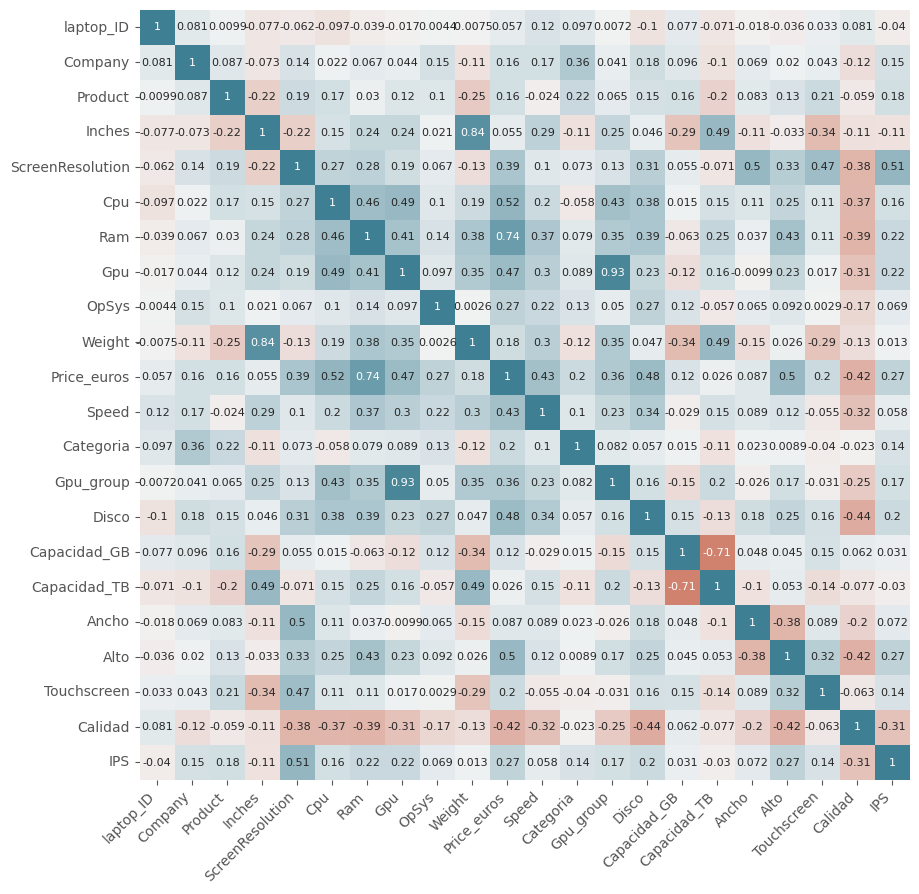

In [19]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

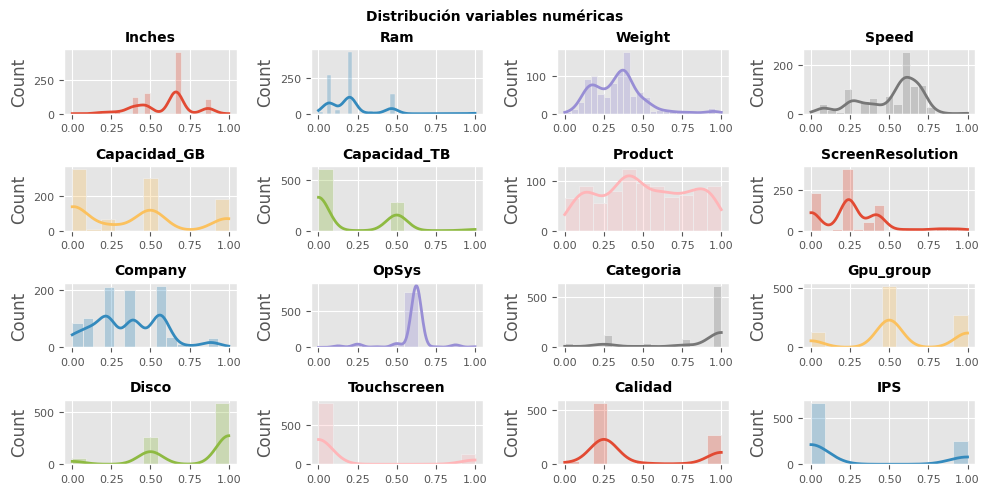

In [20]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
numeric = df_train[['Inches', 'Ram', 'Weight', 'Speed', 'Capacidad_GB', 'Capacidad_TB', 'Product', 'ScreenResolution', 'TypeName', 'Company', 'OpSys', 'Categoria', 'Gpu_group', 'Disco', 'Touchscreen', 'Calidad', 'IPS']]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 5))
axes = axes.flat
columnas_numeric = numeric.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = numeric,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [21]:
X = df_train[['Inches', 'Ram', 'Weight', 'Speed', 'Capacidad_GB', 'Capacidad_TB', 'Product', 'ScreenResolution', 'TypeName', 'Company', 'OpSys', 'Categoria', 'Gpu_group', 'Disco', 'Touchscreen', 'Calidad', 'IPS']]
y = df_train['Price_euros']

df_train['Price_euros'] = np.log(df_train['Price_euros'])
scaler = StandardScaler()
df_train['Price_euros'] = scaler.fit_transform(df_train[['Price_euros']])

y = df_train['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [22]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          1.05e-185
Time:                        14:39:42   Log-Likelihood:                -566.23
No. Observations:                 729   AIC:                             1166.
Df Residuals:                     712   BIC:                             1245.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2796      0.161  

In [23]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = ['Weight', 'Touchscreen', 'IPS', 'Company', 'Product'])
X_test  = X_test.drop(columns = ['Weight', 'Touchscreen', 'IPS','Company', 'Product'])

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     166.1
Date:                Mon, 22 Jan 2024   Prob (F-statistic):          9.61e-189
Time:                        14:39:43   Log-Likelihood:                -571.89
No. Observations:                 729   AIC:                             1168.
Df Residuals:                     717   BIC:                             1223.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2105      0.158  

In [24]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

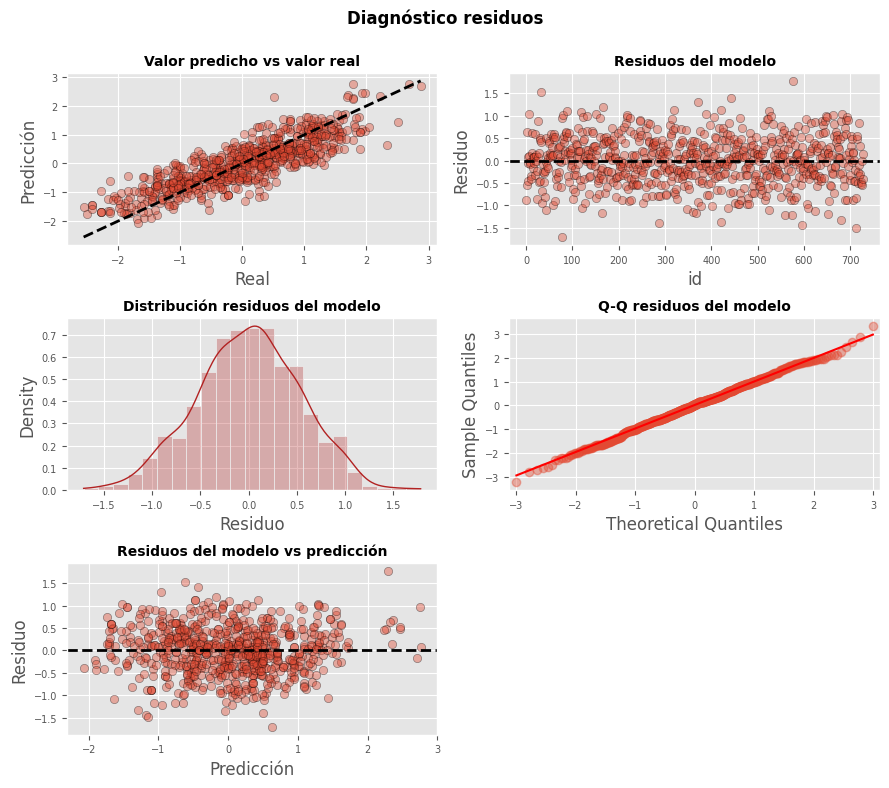

In [25]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [26]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuos_train)
print(shapiro_test)

ShapiroResult(statistic=0.9984264373779297, pvalue=0.7645858526229858)


In [27]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
from scipy.stats import normaltest

k2, p_value = normaltest(residuos_train)
print(f"Estadítico = {k2}, p-value = {p_value}")

Estadítico = 0.6995851920537811, p-value = 0.7048342599859472


In [28]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
TypeName,,,,,,
2 in 1 Convertible,-0.115104,0.062302,-0.237419,0.007212,-1.171854,0.941647
Ultrabook,0.643078,0.047979,0.548883,0.737274,-0.410788,1.696944
Netbook,0.406869,0.049724,0.309247,0.504490,-0.647309,1.461047
Notebook,0.107401,0.045022,0.019010,0.195793,-0.945962,1.160765


In [29]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.46498807519985313


In [30]:
y = scaler.inverse_transform(y.values.reshape(1,-1))
# Inversión de la logaritmización
y = np.exp(y)

In [31]:
y = y.ravel()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (912, 16)
Train features shape: (729, 16)
Train target shape: (729,)
Test features shape: (183, 16)
Test target shape: (183,)


In [33]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

#creating LinearRegression Object
lm = LinearRegression()
lm.fit(X_train, y_train)

print("Intercept:", lm.intercept_)
print("Coeficiente:", list(zip(X.columns, lm.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", lm.score(X_test, y_test))

predicciones = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

Intercept: -411.7523869945644
Coeficiente: [('Inches', -579.7492001475572), ('Ram', 2469.8915513106895), ('Weight', 418.7596236799943), ('Speed', 544.3633326357253), ('Capacidad_GB', 233.23233041467483), ('Capacidad_TB', -0.025038907932867005), ('Product', 89.84753441391024), ('ScreenResolution', 357.78002298549177), ('Company', 10.525697409046074), ('OpSys', 486.861684319308), ('Categoria', 211.6054228582272), ('Gpu_group', 238.7734733820073), ('Disco', 184.93050031924014), ('Touchscreen', 88.82174734822274), ('Calidad', -68.76839801742369), ('IPS', -52.83599724696691)]
Coeficiente de determinación R^2: 0.6927337047084445
MAE: 269.66141957515146
MSE: 115647.79531587282
RMSE: 340.07027996558713


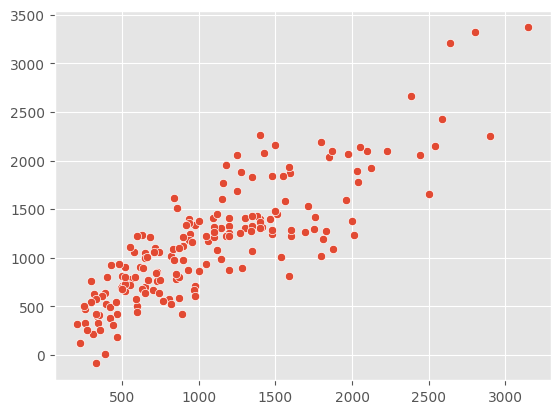

In [34]:
sns.scatterplot(x = y_test, y = predicciones);

In [35]:
lm.fit(X,y)

LinearRegression()

In [36]:
predicciones_2 = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predicciones_2))
print('MSE:', metrics.mean_squared_error(y_test, predicciones_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones_2)))

MAE: 259.8157770464778
MSE: 107764.54901073026
RMSE: 328.2751117747586


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Regresión Elastic Net': ElasticNet(),
    'Regresión Polinómica': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'SVR': make_pipeline(PowerTransformer(), SVR()),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Entrenar y evaluar los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f"  RMSE: {rmse}")
    print(f"  R^2: {r2}")



Regresión Lineal:
  RMSE: 423.1105605445028
  R^2: 0.6443595931764226

Regresión Ridge:
  RMSE: 426.1088763475454
  R^2: 0.6393013387813349

Regresión Lasso:
  RMSE: 422.36913919031207
  R^2: 0.6456048864516521

Regresión Elastic Net:
  RMSE: 622.1803934778576
  R^2: 0.23098287594395683

Regresión Polinómica:
  RMSE: 400.1658616265811
  R^2: 0.6818855184239301

SVR:
  RMSE: 715.8195769585689
  R^2: -0.017912650000637687

Random Forest:
  RMSE: 330.9602957655782
  R^2: 0.7824018693642696

Gradient Boosting:
  RMSE: 322.4075215499073
  R^2: 0.7935030230242539


### Vemos si esta todo ok

In [38]:
df_test = pd.read_csv('./data/test.csv')

In [39]:
df_test['Ram'] =  df_test['Ram'].map( lambda x : x.rstrip('GB')).astype(int)
df_test['Weight'] =  df_test['Weight'].map( lambda x : x.rstrip('kg')).astype(float)

df_test['Speed'] = df_test['Cpu'].str.extract('(\d+(?:\.\d+)?)GHz').astype(float)
df_test['Cpu'] = df_test['Cpu'].str.replace(r'(\d+(?:\.\d+)?)GHz', '', regex=True)
def procesar_columna(columna):
    # Verificar si la columna tiene algún valor
    if pd.notna(columna):
        # Utilizar el método split para obtener una lista
        lista_resultante = str(columna).split()

        # Verificar la longitud de la lista y realizar el reemplazo adecuado
        if len(lista_resultante) >= 2:
            return f"{lista_resultante[0]} {lista_resultante[1]}"
        elif len(lista_resultante) == 1:
            return lista_resultante[0]
    
    # Valor predeterminado si no se puede procesar la columna
    return 'Unk'

df_test['Product'] = df_test['Product'].apply(procesar_columna)
pattern = re.compile(r'\([^)]*\)?')
df_test['Product'] = [re.sub(pattern, '', laptop).strip() if '(' in laptop else laptop for laptop in df_test['Product']]

def categorizar_por_marca(producto):
    if 'Aspire' in producto:
        return 'Acer Aspire'
    elif 'XPS' in producto or 'Inspiron' in producto:
        return 'Dell XPS/Inspiron'
    elif 'Elitebook' in producto or 'ProBook' in producto:
        return 'HP Elitebook/ProBook'
    elif 'IdeaPad' in producto or 'Legion' in producto:
        return 'Lenovo IdeaPad/Legion'
    # Agregar más marcas según sea necesario
    else:
        return 'Otras Marcas'

# Crear una nueva columna 'Categoria' en el DataFrame
df_test['Categoria'] = df_test['Product'].apply(categorizar_por_marca)

def asignar_grupo(gpu_nombre):
    if re.search(r'Intel', gpu_nombre):
        return 'Intel'
    elif re.search(r'Nvidia', gpu_nombre):
        return 'Nvidia'
    elif re.search(r'AMD', gpu_nombre):
        return 'AMD'
    else:
        return 'Otro'

# Aplicar la función para crear una nueva columna 'Gpu_group'
df_test['Gpu_group'] = df_test['Gpu'].apply(asignar_grupo)

df_test['Disco'] = df_test['Memory'].str.extract('(HDD|SSD)', expand=False).fillna('Any')
df_test['Capacidad'] = df_test['Memory'].str.replace(r'(HDD|SSD)', '', regex=True)

def procesar_capacidad(df, columna_capacidad):
    df['Capacidad_GB'] = 0
    df['Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    add_gb = df[columna_capacidad].str.extract('(\d+)GB \+ (\d+)GB', expand=False)
    add_tb = df[columna_capacidad].str.extract('(\d+)TB \+ (\d+)TB', expand=False)

    mask_plus = df[columna_capacidad].str.contains('\+')
    
    df.loc[~mask_plus, 'Capacidad_GB'] = df[columna_capacidad].str.extract('(\d+)GB', expand=False).astype(float).fillna(0)
    df.loc[~mask_plus, 'Capacidad_TB'] = df[columna_capacidad].str.extract('(\d+)TB', expand=False).astype(float).fillna(0)

    df['Capacidad_GB'] += add_gb[0].astype(float).fillna(0) + add_gb[1].astype(float).fillna(0)
    df['Capacidad_TB'] += add_tb[0].astype(float).fillna(0)

    df['Capacidad_TB'] += df['Capacidad_GB'] // 1000
    df['Capacidad_GB'] %= 1000

    return df

procesar_capacidad(df_test, 'Capacidad')

df_test.set_index(['TypeName'], inplace= True)

In [40]:
# Función para extraer los números, determinar si es touchscreen, identificar la calidad de la pantalla y si contiene IPS Panel
def extraer_numeros_touch_calidad_ips(cadena):
    numeros = re.findall(r'\d+', cadena)
    touch = 'Touchscreen' in cadena
    calidad = re.search(r'(Full HD|Quad HD|4K Ultra HD|Retina Display)', cadena)
    calidad = calidad.group() if calidad else None
    ips_panel = 'IPS Panel' in cadena
    return {'Ancho': int(numeros[0]), 'Alto': int(numeros[1]), 'Touchscreen': touch, 'Calidad': calidad, 'IPS': ips_panel}

# Aplicar la función y expandir los resultados en nuevas columnas
df_test[['Ancho', 'Alto', 'Touchscreen', 'Calidad', 'IPS']] = df_test['ScreenResolution'].apply(extraer_numeros_touch_calidad_ips).apply(pd.Series)

df_test.fillna(0)

,laptop_ID,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Gpu_group,Disco,Capacidad,Capacidad_GB,Capacidad_TB,Ancho,Alto,Touchscreen,Calidad,IPS
TypeName,,,,,,,,,,,,,,,,,,,,,
Notebook,750,Toshiba,Tecra X40-D-10G,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,Windows 10,...,Intel,SSD,256GB,256.0,0.0,1920,1080,True,Full HD,True
Notebook,726,Mediacom,Smartbook 142,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350,4,32GB HDD,Intel HD Graphics 400,Windows 10,...,Intel,HDD,32GB,32.0,0.0,1920,1200,False,Full HD,True
Notebook,633,Mediacom,SmartBook 140,14.0,Full HD 1920x1080,Intel Atom x5-Z8350,2,32GB Flash Storage,Intel HD Graphics,Windows 10,...,Intel,Any,32GB Flash Storage,32.0,0.0,1920,1080,False,Full HD,False
Gaming,363,Dell,Inspiron 7577,15.6,Full HD 1920x1080,Intel Core i5 7300HQ,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,...,Nvidia,HDD,1TB,0.0,1.0,1920,1080,False,Full HD,False
2 in 1 Convertible,319,Asus,VivoBook Flip,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,...,Intel,Any,32GB Flash Storage,32.0,0.0,1366,768,True,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gaming,693,Dell,Alienware 15,15.6,Full HD 1920x1080,Intel Core i7 7820HK,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,...,Nvidia,SSD,256GB + 1TB,0.0,1.0,1920,1080,False,Full HD,False
Ultrabook,1132,Razer,Blade Stealth,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U,8,256GB SSD,Intel HD Graphics 520,Windows 10,...,Intel,SSD,256GB,256.0,0.0,4,3840,True,4K Ultra HD,False
Notebook,49,Dell,Inspiron 3567,15.6,Full HD 1920x1080,Intel Core i5 7200U,4,256GB SSD,AMD Radeon R5 M430,Windows 10,...,AMD,SSD,256GB,256.0,0.0,1920,1080,False,Full HD,False


In [41]:
numeric_features = ['Inches', 'Ram', 'Weight', 'Speed', 'Capacidad_GB', 'Capacidad_TB','Ancho', 'Alto']
categorical_features = ['Product', 'Company', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys', 'Categoria', 'Gpu_group', 'Disco',  'Touchscreen', 'Calidad', 'IPS']

label_encoder = LabelEncoder()
scaler = MinMaxScaler()

# Iterar sobre las columnas y aplicar LabelEncoder a cada una
for column in categorical_features:
    df_test[column] = label_encoder.fit_transform(df_test[column])

df_test[categorical_features] = scaler.fit_transform(df_test[categorical_features])
df_test[numeric_features] = scaler.fit_transform(df_test[numeric_features])

In [42]:
df_test.columns

Index(['laptop_ID', 'Company', 'Product', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Speed', 'Categoria',
       'Gpu_group', 'Disco', 'Capacidad', 'Capacidad_GB', 'Capacidad_TB',
       'Ancho', 'Alto', 'Touchscreen', 'Calidad', 'IPS'],
      dtype='object')

In [43]:
df_test2 =df_test[['Inches', 'Ram', 'Weight', 'Speed', 'Capacidad_GB', 'Capacidad_TB','Product', 'ScreenResolution', 'Company', 'OpSys', 'Categoria',
       'Gpu_group', 'Disco', 'Touchscreen', 'Calidad', 'IPS']]

In [44]:
df_test2.columns

Index(['Inches', 'Ram', 'Weight', 'Speed', 'Capacidad_GB', 'Capacidad_TB',
       'Product', 'ScreenResolution', 'Company', 'OpSys', 'Categoria',
       'Gpu_group', 'Disco', 'Touchscreen', 'Calidad', 'IPS'],
      dtype='object')

In [45]:
X.columns

Index(['Inches', 'Ram', 'Weight', 'Speed', 'Capacidad_GB', 'Capacidad_TB',
       'Product', 'ScreenResolution', 'Company', 'OpSys', 'Categoria',
       'Gpu_group', 'Disco', 'Touchscreen', 'Calidad', 'IPS'],
      dtype='object')

In [46]:
predictions_submit = lm.predict(df_test2)
predictions_submit

array([ 9.78915566e+02,  4.94333005e+02,  1.80324491e+02,  5.86621661e+02,
        5.99641844e+02,  3.59131891e+02,  3.57648956e+02,  1.17849655e+03,
        1.40864886e+03,  8.72468802e+02,  7.01788140e+02,  8.78532331e+02,
        8.79729433e+02,  6.20362755e+02,  4.71172480e+02,  7.63647767e+02,
        6.91547951e+02,  1.33837841e+03,  1.88776917e+02,  5.98714696e+02,
        1.01644606e+03,  6.66800052e+02,  5.14133353e+02,  6.22905596e+02,
        1.78694292e+02,  1.07808752e+03,  2.88885408e+02,  3.73605784e+02,
        5.58171237e+02,  8.72468802e+02,  4.25736026e+02,  8.08570908e+02,
        7.86290825e+02,  5.85506867e+02,  9.01886011e+02,  9.49029249e+02,
        6.60449259e+02,  1.09432286e+03,  3.95235037e+02,  1.42766044e+03,
        1.25950058e+03,  8.18909496e+02, -1.38752218e+01,  1.34105095e+03,
        6.47701145e+02,  1.21576862e+03,  6.56030497e+02,  1.09124957e+03,
        8.34136129e+02,  1.19187702e+03,  8.32577667e+02,  1.36928558e+01,
        3.94853510e+02,  

In [47]:
submission = pd.DataFrame({"laptop_ID": df_test['laptop_ID'], "Price_euros": predictions_submit}).reset_index().drop(columns = 'Company')


In [48]:
submission

,laptop_ID,Price_euros
0,750,978.915566
1,726,494.333005
2,633,180.324491
3,363,586.621661
4,319,599.641844
...,...,...
386,693,1277.098520
387,1132,1312.772568
388,49,458.107959
389,1243,259.937098


In [49]:
submission.shape

(391, 2)

In [50]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == submission.shape:
        if df_to_submit.columns.all() == submission.columns.all():
            if df_to_submit.laptop_ID.all() == submission.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [51]:
chequeator(submission)

You're ready to submit!


NameError: name 'urllib' is not defined

In [53]:
submission.to_csv('./data/Submission.csv', index=False)